### Quick and dirty implementation of MNIST from fast.ai course to show how visualize test and train output


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


## Setup

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [4]:
def onehot(x):
    return to_categorical(x)

In [5]:
y_train = onehot(y_train)
y_test = onehot(y_test)

In [6]:
y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Standard linear model

In [11]:
batch_size=64
hidden_layer_size = 100
dropout = 0.5

In [16]:
model = Sequential([
            Flatten(input_shape=(28,28)),
            Dense(hidden_layer_size, activation='relu'),
            Dropout(dropout),
            Dense(10, activation='softmax')
        ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, 
          batch_size=batch_size, 
          nb_epoch=1, 
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 3s - loss: 8.6011 - acc: 0.4609 - val_loss: 6.2893 - val_acc: 0.6068

## Saving model output to variable and plotting it

In [53]:
model = Sequential([
            Flatten(input_shape=(28,28)),
            Dense(hidden_layer_size, activation='relu'),
            Dropout(dropout),
            Dense(10, activation='softmax')
        ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_output = model.fit(X_train, y_train, 
          batch_size=batch_size, 
          nb_epoch=20, 
          validation_data=(X_test, y_test),
          verbose=0)

In [54]:
print(model_output.history)

{'acc': [0.44958333333333333, 0.61921666666666664, 0.72416666666666663, 0.76006666666666667, 0.76838333333333331, 0.77126666666666666, 0.77600000000000002, 0.78369999999999995, 0.78891666666666671, 0.78673333333333328, 0.79351666666666665, 0.79621666666666668, 0.79833333333333334, 0.80354999999999999, 0.82525000000000004, 0.8400333333333333, 0.85593333333333332, 0.85951666666666671, 0.86673333333333336, 0.86296666666666666], 'loss': [8.8087558995564788, 6.0737340920766192, 4.3845104139963782, 3.8193641120910646, 3.6870212071736654, 3.6455604217529296, 3.5714702149709066, 3.4510286707560223, 3.3720205928802489, 3.40300729153951, 3.29849212252299, 3.2543281845092773, 3.2238467264811197, 3.1423967666625976, 2.7869443983713786, 2.5464781574249269, 2.2930621348698934, 2.2369977737426758, 2.1184677440007529, 2.1852702736854552], 'val_acc': [0.58819999999999995, 0.73199999999999998, 0.80920000000000003, 0.81710000000000005, 0.81459999999999999, 0.8196, 0.8206, 0.82940000000000003, 0.824500000

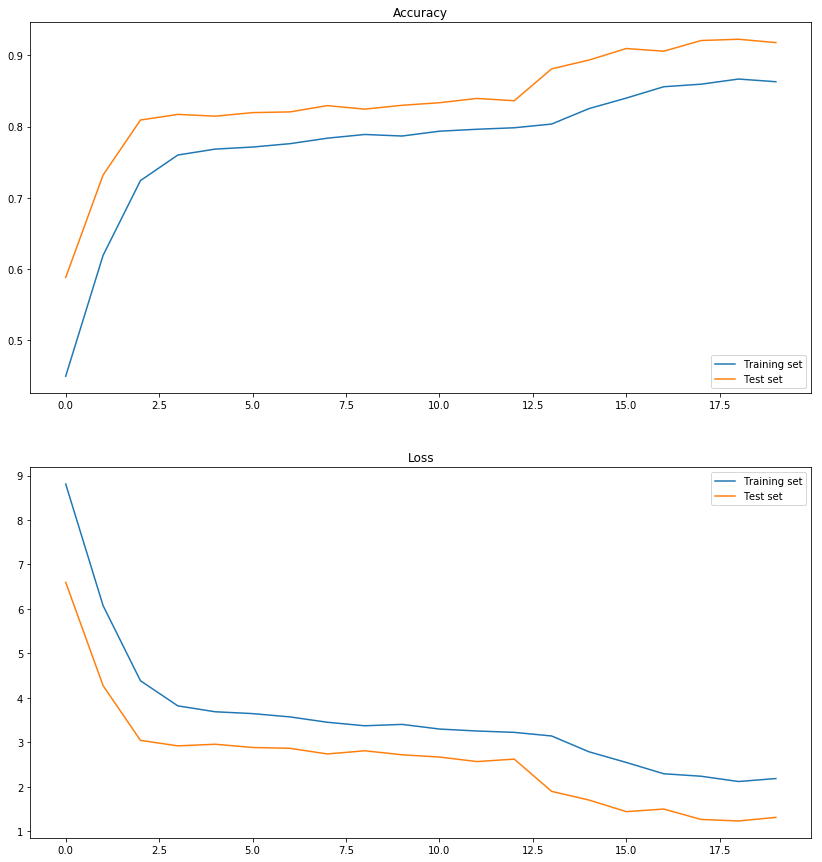

In [55]:
fig, (f1, f2) = plt.subplots(2, 1, figsize=(14, 15))
f1.plot(model_output.history['acc'])
f1.plot(model_output.history['val_acc'])
f1.set_title('Accuracy')
f1.legend(['Training set', 'Test set'], loc='lower right')

f2.plot(model_output.history['loss'])
f2.plot(model_output.history['val_loss'])
f2.set_title('Loss')
f2.legend(['Training set', 'Test set'], loc='upper right')

## Tensorboard

If you're using Tensorflow as Keras backend

In [7]:
from keras.callbacks import TensorBoard

In [21]:
batch_size=64
hidden_layer_size = 50
dropout = 0.9
nb_epoch = 20

In [22]:
model = Sequential([
            Flatten(input_shape=(28,28)),
            Dense(hidden_layer_size, activation='relu'),
            Dropout(dropout),
            Dense(10, activation='softmax')
        ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

path = 'DROPOUT:%s|HIDDEN1:%s|EPOCH:%s' % (dropout, hidden_layer_size, nb_epoch)

model.fit(X_train, y_train, 
          batch_size=batch_size, 
          nb_epoch=nb_epoch, 
          validation_data=(X_test, y_test),
          verbose=0,
          callbacks=[TensorBoard(log_dir='tensorboard/%s' % path)])

Unfortunately callbacks don't work with ***model.fit_generate()***

Once run, tensorboard will collect data in subfolders of folder 'tensorboard'. 

Each run with different parameters will create another subdolder.

## Explore data using Tensorboard

1. Open terminal and navigate to location where your notebook is

2. type ```tensorboard --logdir tensorboard``` and hit enter

This action will launch tensorboard. You will see something similar to:

    Starting TensorBoard 41 on port 6006
    (You can navigate to http://192.168.1.3:6006)
   
   
## Example output

Below screenshot shows one of the plots: Training loss generated using 8 different hyperparameters

In [23]:
from IPython.display import Image

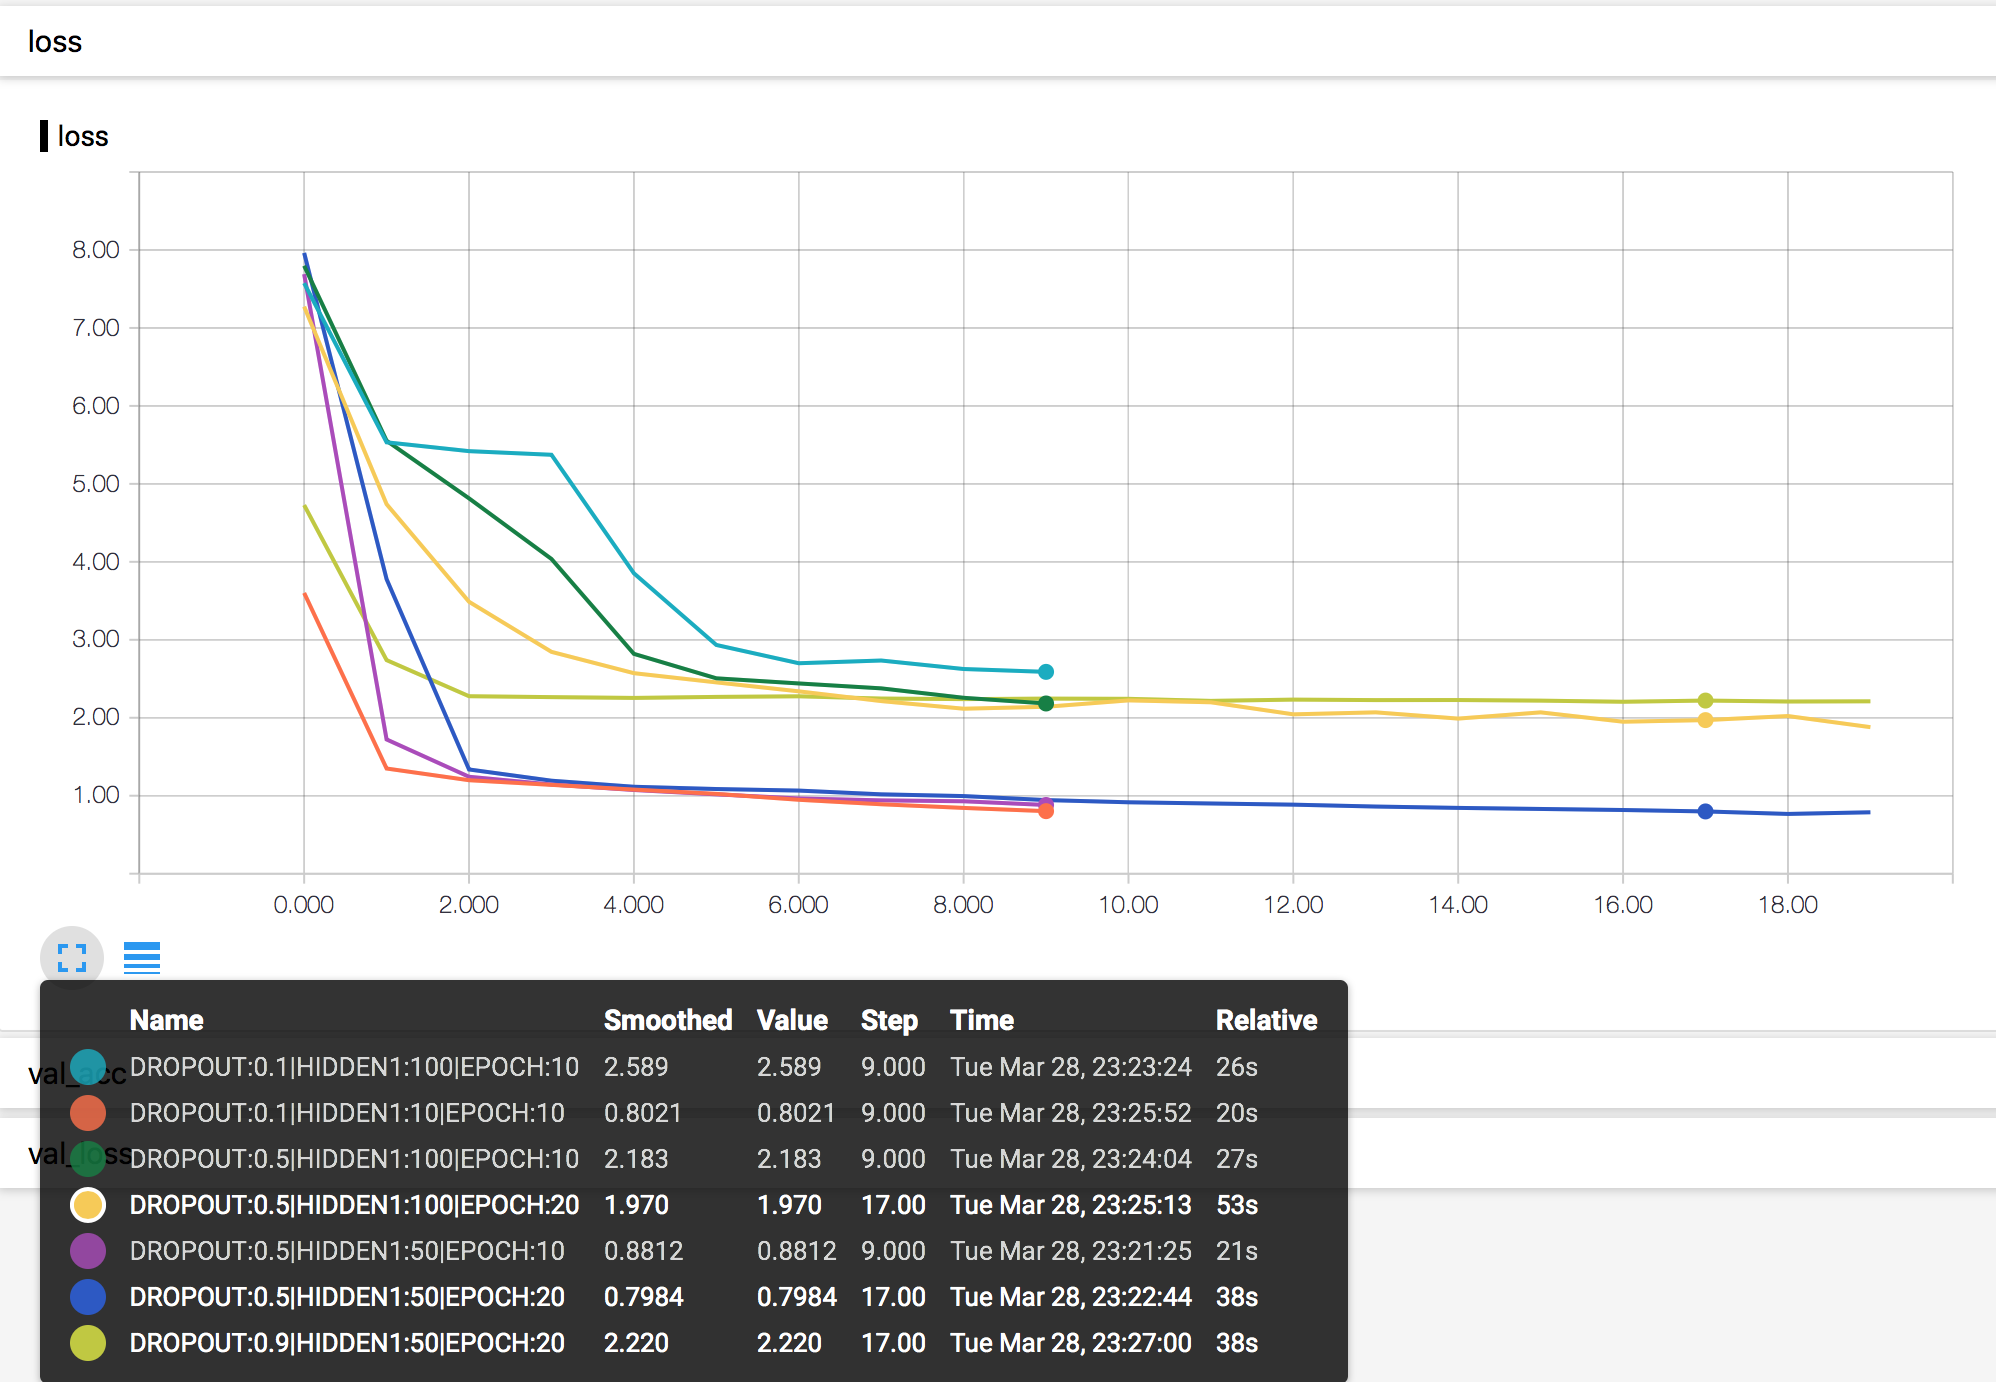

In [24]:
Image('img/tensorboard_loss.png')

### Preset hyper-parameters

In [ ]:
# Next time :)